In [35]:
import numpy as np
import pandas as pd

data = pd.read_csv('./data/log2.csv')

In [6]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


We know that Ports are categorical variables: 

In [36]:
# convert features with "port" in the name into categorical variables

for feature in data: 
    if "Port" in feature:
        data[feature] = data[feature].astype('category')

# data = [data[feature] == data[feature].astype('category') if "port" in feature else data[feature] == data[feature] for feature in data]

In [38]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

encoded = enc.fit_transform(data.drop('Action', axis=1), data['Action'])

Encoded is now a sparse matrix of our data with all the ports as one hot encoded columns.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded, data['Action'], test_size=0.2, random_state=42)

In [47]:
from sklearn.svm import LinearSVC

clf = LinearSVC(dual = True)
model = clf.fit(X_train, y_train)

In [49]:
preds = model.predict(X_test)

<Figure size 800x600 with 0 Axes>

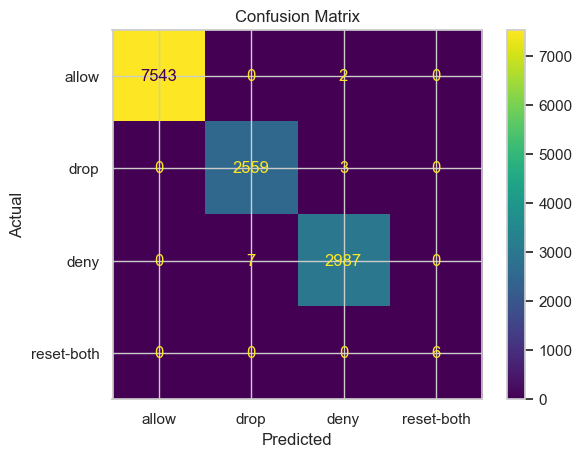

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      1.00      1.00         6

    accuracy                           1.00     13107
   macro avg       1.00      1.00      1.00     13107
weighted avg       1.00      1.00      1.00     13107



In [63]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

labels = data['Action'].unique().tolist()
#matrix = confusion_matrix(y_test, preds, labels = labels)
plt.figure(figsize=(8, 6))
#sns.heatmap(matrix, annot=True, fmt="d")

ConfusionMatrixDisplay.from_predictions(y_test, preds, labels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, preds))

In [60]:
data["Action"].unique().tolist()

['allow', 'drop', 'deny', 'reset-both']